# Data
The data contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set here and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [58]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [101]:
#replace ? as NaN
cars = cars.apply(lambda col: col.replace('?',np.nan))
# eye ball the columns and decide the numeric cols
num_cols = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
# turn object to numeric (float)
cars[num_cols] = cars[num_cols].astype(float)
# fill column mean to replace NaN for numeric columns
na_cols_counts = cars.isna().sum()
na_cols = na_cols_counts[na_cols_counts>0].index
for col in cars[na_cols].select_dtypes(include = [int,float]).columns:
    cars[col] = cars[col].fillna(cars[col].mean())
norm_num_cars = cars.select_dtypes([int,float]).apply(lambda col: (col.max() - col)/(col.max()-col.min()))
norm_num_cars['price'] = cars['price']
norm_num_cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.433171,0.701571,0.645581,0.508220,0.532683,0.506260,0.585894,0.751293,0.435892,0.435513,0.803591,0.765599,0.601890,0.660569,0.611810,13207.129353
std,0.249061,0.165869,0.175562,0.184139,0.178767,0.203627,0.201971,0.157142,0.193460,0.149332,0.248253,0.164663,0.194685,0.181726,0.181222,7868.768212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.200000,0.623037,0.539359,0.373134,0.450000,0.358333,0.438712,0.698113,0.257143,0.361905,0.850000,0.716667,0.448980,0.527778,0.526316,7788.000000
50%,0.400000,0.701571,0.696793,0.520896,0.566667,0.475000,0.640807,0.777358,0.450000,0.419048,0.875000,0.804167,0.571429,0.694444,0.631579,10595.000000
75%,0.600000,0.811518,0.769679,0.623881,0.683333,0.650000,0.745151,0.864151,0.564286,0.504762,0.900000,0.908333,0.734694,0.833333,0.763158,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


In [226]:
def knn_train_test(df, features, target, k = 5):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    train = df[:int(df.shape[0]/2)]
    test = df[int(df.shape[0]/2):]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[[features]],train[target])
    prediction = knn.predict(test[[features]])
    rmse = mean_squared_error(prediction, test[target])**.5
    return rmse

## Which column performed the best using the default k value?

In [227]:
univariated_rmses = [(col, knn_train_test(norm_num_cars, col, 'price')) for col in norm_num_cars.columns.drop('price')]
dict(univariated_rmses)

{'bore': 6672.384513055428,
 'city-mpg': 4922.6189670213635,
 'compression-rate': 7049.251155889131,
 'curb-weight': 4436.622268403989,
 'engine-size': 4206.70484582864,
 'height': 7811.80693511162,
 'highway-mpg': 4393.362214316394,
 'horsepower': 5108.2572395964,
 'length': 5429.534177572865,
 'normalized-losses': 7763.254743522455,
 'peak-rpm': 8354.851537145458,
 'stroke': 7730.640418819794,
 'symboling': 7910.7128329479665,
 'wheel-base': 5802.636206669098,
 'width': 5276.211461813919}

In [211]:
def knn_train_test(df, features, target, k = 2):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    train = df[:int(df.shape[0]/2)]
    test = df[int(df.shape[0]/2):]
    rmse_k = {}
    for k in range(1,k,2):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[features],train[target])
        prediction = knn.predict(test[features])
        rmse = mean_squared_error(prediction, test[target])**.5
        rmse_k[k] = rmse
    return rmse_k

univariated_rmses_k = [(col, knn_train_test(norm_num_cars, [col], 'price', k = 10)) for col in norm_num_cars.columns.drop('price')]
k_rmse_dict = dict(univariated_rmses_k)
k_rmse_dict

{'bore': {1: 7226.093844104662,
  3: 7186.583573524976,
  5: 6672.384513055428,
  7: 6803.715620311049,
  9: 7121.836639543615},
 'city-mpg': {1: 6207.81823468476,
  3: 4675.87768009349,
  5: 4922.6189670213635,
  7: 4953.784296674458,
  9: 4995.523070008012},
 'compression-rate': {1: 8694.284532366759,
  3: 7741.259146310336,
  5: 7049.251155889131,
  7: 7530.096072857691,
  9: 7415.349304194644},
 'curb-weight': {1: 5842.581355445898,
  3: 4527.849193303364,
  5: 4436.622268403989,
  7: 4326.543875548528,
  9: 4216.735072682265},
 'engine-size': {1: 5038.713992157654,
  3: 4289.717839978719,
  5: 4206.70484582864,
  7: 4094.8876270224255,
  9: 4073.5949857875103},
 'height': {1: 8566.78034796343,
  3: 8324.292632411869,
  5: 7811.80693511162,
  7: 7777.249725225809,
  9: 7561.965107374333},
 'highway-mpg': {1: 4768.955381716262,
  3: 4715.814830055013,
  5: 4393.362214316394,
  7: 4137.176513067704,
  9: 4419.897654161808},
 'horsepower': {1: 5361.102326259187,
  3: 4858.457039551548

Visualize the results using a scatter plot or a line plot.

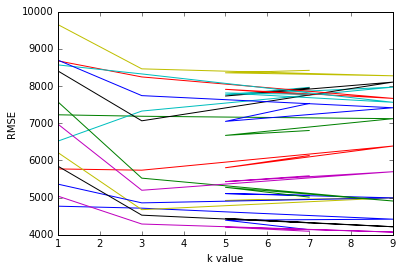

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt

for k,v in k_rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [212]:
feature_avg_rmse = {}
for k,v in k_rmse_dict.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
avg_rsme_cols = series_avg_rmse.sort_values()

In [223]:
k_rmse_results = dict([('best_'+str(i)+'_features', knn_train_test(norm_num_cars,avg_rsme_cols.index.tolist()[:i],'price',k=26)) for i in range(2,6)])

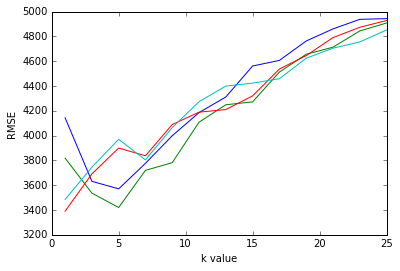

In [224]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')